# Descubra as melhores notas de matemática do ENEM 2016

Você deverá criar um modelo para prever a nota da prova de matemática de quem participou do ENEM 2016. Para isso, usará Python, Pandas, Sklearn e Regression.


## Tópicos

Neste desafio você aprenderá:

- Python
- Pandas
- Sklearn
- Regression

## Detalhes

O contexto do desafio gira em torno dos resultados do ENEM 2016 (disponíveis no arquivo train.csv). Este arquivo, e apenas ele, deve ser utilizado para todos os desafios. Qualquer dúvida a respeito das colunas, consulte o [Dicionário dos Microdados do Enem 2016](https://s3-us-west-1.amazonaws.com/acceleration-assets-highway/data-science/dicionario-de-dados.zip).

No arquivo test.csv crie um modelo para prever nota da prova de matemática (coluna `NU_NOTA_MT`) de quem participou do ENEM 2016. 

Salve sua resposta em um arquivo chamado answer.csv com duas colunas: `NU_INSCRICAO` e `NU_NOTA_MT`.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

/home/bruno/codenation/data-science-1/venv/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
train = pd.read_csv('../data/train.csv', index_col='Unnamed: 0')
train.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
1,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2016,4314902,Porto Alegre,43,RS,24,M,0.0,1,...,5.0,A,A,A,A,A,A,A,B,D
2,2c3acac4b33ec2b195d77e7c04a2d75727fad723,2016,2304707,Granja,23,CE,17,F,0.0,3,...,NaN,A,A,C,A,B,A,A,C,A
3,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,2016,2304400,Fortaleza,23,CE,21,F,0.0,3,...,NaN,A,A,A,A,C,A,A,B,A
4,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,2016,3304557,Rio de Janeiro,33,RJ,25,F,0.0,0,...,5.0,C,A,A,A,A,D,A,A,A
5,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,2016,1302603,Manaus,13,AM,28,M,0.0,2,...,NaN,A,A,A,A,A,A,A,A,A


In [3]:
train.shape

(13730, 166)

In [4]:
train.columns

Index(['NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA',
       'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       ...
       'Q041', 'Q042', 'Q043', 'Q044', 'Q045', 'Q046', 'Q047', 'Q048', 'Q049',
       'Q050'],
      dtype='object', length=166)

In [5]:
# Create dataframe with important infos
def create_info(df):
    df_infos = pd.DataFrame({'column': df.columns,
                             'n_missing': df.isna().sum(),
                             'dtype': df.dtypes,
                             'n_unique': df.nunique()}).reset_index().drop('index', axis=1)
    return df_infos

In [6]:
train_infos = create_info(train)
train_infos.head()

,column,n_missing,dtype,n_unique
0,NU_INSCRICAO,0,object,13730
1,NU_ANO,0,int64,1
2,CO_MUNICIPIO_RESIDENCIA,0,int64,2709
3,NO_MUNICIPIO_RESIDENCIA,0,object,2632
4,CO_UF_RESIDENCIA,0,int64,27


In [7]:
# Visualize columns that seems to have no significance for the training model
large_nunique = train_infos['n_unique'] > 100
thin_nunique = train_infos['n_unique'] == 1
columns_drop = list(train_infos[large_nunique | thin_nunique]['column'])
keep_columns = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',]
for column in keep_columns:
    try:
        columns_drop.remove(column)
    except:
        pass

In [16]:
df = train.copy()
try:
    df.drop(columns_drop, axis=1, inplace=True)
except:
    pass
df.head()

,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,...,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
1,43,RS,24,M,0.0,1,1,43.0,RS,1,...,5.0,A,A,A,A,A,A,A,B,D
2,23,CE,17,F,0.0,3,1,23.0,CE,2,...,NaN,A,A,C,A,B,A,A,C,A
3,23,CE,21,F,0.0,3,1,23.0,CE,3,...,NaN,A,A,A,A,C,A,A,B,A
4,33,RJ,25,F,0.0,0,1,33.0,RJ,1,...,5.0,C,A,A,A,A,D,A,A,A
5,13,AM,28,M,0.0,2,1,15.0,PA,1,...,NaN,A,A,A,A,A,A,A,A,A


In [17]:
df_infos = create_info(df)
# Numerical columns
col_int = df_infos['dtype'] == 'int64'
col_float = df_infos['dtype'] == 'float64'
# Categorical variables
col_cat = df_infos['dtype'] == 'object'
num_features = list(df_infos[col_int | col_float]['column'])
cat_features = list(df_infos[col_cat]['column'])
features = num_features + cat_features

In [18]:
df_infos[train_infos['n_missing'] > 0]

,column,n_missing,dtype,n_unique
4,TP_ESTADO_CIVIL,528,float64,4
7,CO_UF_NASCIMENTO,609,float64,27
8,SG_UF_NASCIMENTO,609,object,27
12,TP_ENSINO,9448,float64,3
14,CO_UF_ESC,9448,float64,27
15,SG_UF_ESC,9448,object,27
16,TP_DEPENDENCIA_ADM_ESC,9448,float64,4
17,TP_LOCALIZACAO_ESC,9448,float64,2
18,TP_SIT_FUNC_ESC,9448,float64,2
49,NO_ENTIDADE_CERTIFICACAO,12092,object,61


In [25]:
num_values = dict(zip(num_features, np.zeros(len(num_features))))
cat_values = dict(zip(cat_features, 'None'))

df.fillna(num_values, inplace=True)
df.fillna(cat_values, inplace=True)

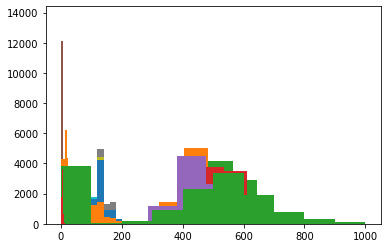

In [27]:
for column in num_features:
    plt.hist(df[column])
    
plt.show()